# Training Neural Networks for MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


# The MNIST data

In [4]:
data=tf.keras.datasets.mnist

In [5]:
#split the data into train and test data set while loading the data
(train_images,train_labels),(test_images,test_labels)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


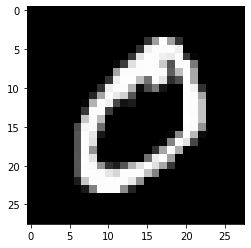

In [16]:
plt.imshow(train_images[1],cmap='gray')

In [17]:
train_labels[1]

0

In [6]:
#Checking the shape of the test and train data
print(train_images.shape,train_labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
#Checking the max values present in train and test data set
print(np.max(train_images),np.max(train_labels),np.max(test_images),np.max(test_labels))

255 9 255 9


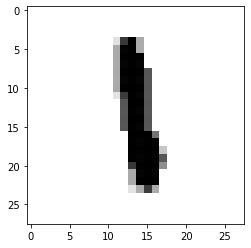

In [8]:
#Randomly plotting the train data set to check if the data is fed properly
plt.imshow(train_images[200],cmap="binary")

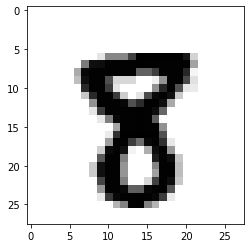

In [9]:
#Randomly plotting the test data set to check if the data is fed properly
plt.imshow(test_images[128],cmap="binary")

In [10]:
#Assigning class names to the mnist numerical dataset
class_names=['zero','one','two','three','four',
            'five','six','seven','eight','nine']

In [11]:
#crossing checking the dataframe values
class_names[9]

'nine'

In [12]:
#Normalising the train and test dataset in the range[0,1]
train_images=train_images/255.0
test_images=test_images/255.0

In [13]:
#checking the normalised values in test and train data set
print(np.max(train_images),np.max(test_images))

1.0 1.0


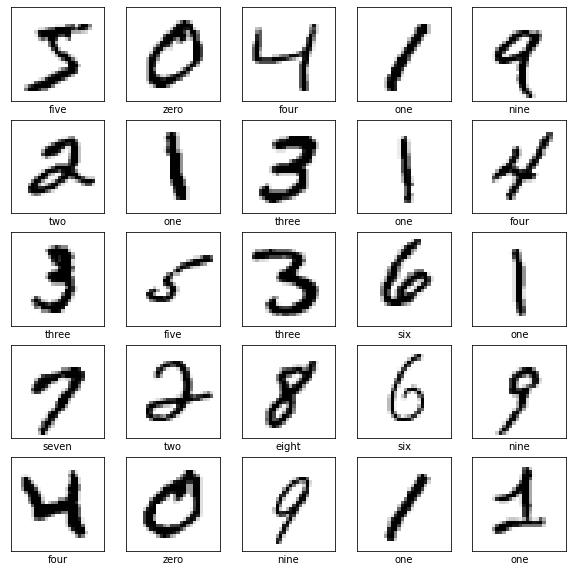

In [14]:
#Plotting the values with the class name defined before feeding to the network
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# Model is a sequential model(meaning that the layers are stacked one after the other):

-Data is  flattened and then fed into the newtork with shape 784(28*28)

-Hidden layer is with 128 neurons with rectified linear(Relu) as the activation function.

-Droupout layer is used to drop the values of neurons randomly so that the network doesn't depend or overwhelmed with the value from a particular neuron

-Finally,the output layer with 10 neurons and activation function as softmax.


In [18]:
#defining the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28),name='Input_Layer'),
    tf.keras.layers.Dense(128, activation=tf.nn.relu,name='Hidden_Layer'),
    tf.keras.layers.Dropout(0.25,name='Dropout_Layer'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax,name='Output_Layer')
])

-Input layer =28*28=784

-hidden layer=(128*784)+128=100480

-output layer=(128*10)+10=1290

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer (Dense)         (None, 128)               100480    
_________________________________________________________________
Dropout_Layer (Dropout)      (None, 128)               0         
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Adam optimizer converges faster than other optimizers(also works better with sparse data)

Since,it is a multiclass problem with class names ranging from zero to nine. i have used sparse categorical entropy with metrics as accuracy

In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
#model is fit with training data
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8539
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1561 - accuracy: 0.9538
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1185 - accuracy: 0.9646
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0957 - accuracy: 0.9706
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0827 - accuracy: 0.9743


In [22]:
#Accuracy is determioned using test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 930us/step - loss: 0.0751 - accuracy: 0.9774
Test accuracy: 0.977400004863739


In [23]:
#prediction are made using test dataset
predictions = model.predict(test_images)

In [24]:
#randomly checking the data
predictions[200], sum(predictions[200])

(array([1.18046399e-08, 1.13887279e-06, 1.43051345e-03, 9.93461132e-01,
        2.87351760e-08, 3.28189693e-03, 5.58720792e-10, 1.42960435e-08,
        1.82429014e-03, 8.96994322e-07], dtype=float32),
 0.9999999238412307)

In [25]:
#reproducing the same code used in lecture to find how accurate the image is classified
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

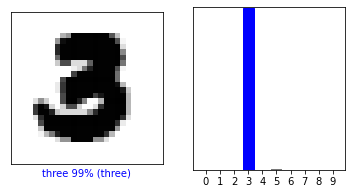

In [26]:
#plotting to find the accuracy of image trained
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

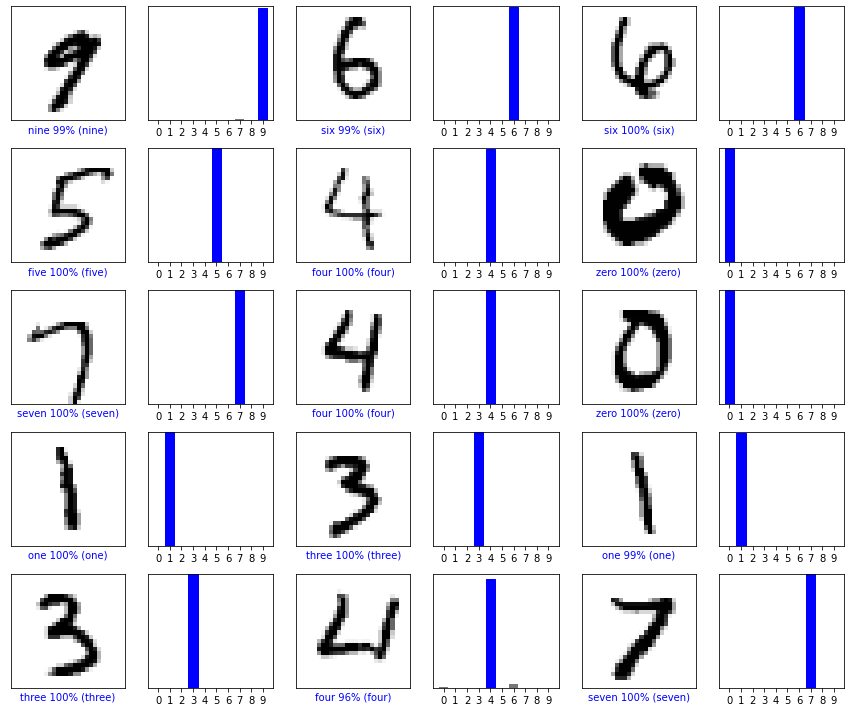

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

offset=20
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()